### Student Information
Name: 林育丞

Student ID: 112062595

GitHub ID: ryonaya

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

# Take home exercises

### Pre-setup for Exercises

In [18]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42) 

import pandas as pd
import helpers.data_mining_helpers as dmh
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

import seaborn as sns
import plotly.graph_objs as go
import numpy as np

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# sort term frequencies with the feature names
paired_values = list(zip(count_vect.get_feature_names_out(), term_frequencies))
sorted_paired_values = sorted(paired_values, key=lambda x: x[1], reverse=True)

import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

from sklearn.manifold import TSNE
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

from sklearn import preprocessing, metrics, decomposition, pipeline, dummy


### Exercise 2 (take home):

In [ ]:
X.loc[:10, [t for t in X.columns]]

### Exercise 5 (take home)

Answer here <br>
```markdown
np.nan, None, missing column are considered as null values 
'NaN', 'None' are valid entries but displayed like np.nan and None
'' empty string is valid and display nothing

### Exercise 6 (take home):

Answer here
```markdown
The entries are randomly drawn from the original dataset
It's a subset of the original dataset
The index is not ordered

### Exercise 8 (take home):

In [ ]:
# Answer here
# comparison of X and X_sample in the same plot, using different colors
fig, ax = plt.subplots()
X_sample = X.sample(n=1000) #random state
upper_bound = X.category_name.value_counts().max() + 35

X.category_name.value_counts().plot(kind = 'bar', 
                                    color='skyblue', 
                                    ax = ax, 
                                    width = 0.2, 
                                    position = 1, 
                                    title = 'Category distribution', 
                                    ylim = [0, upper_bound], 
                                    rot = 0, fontsize = 11, figsize = (8,3))
X_sample.category_name.value_counts().plot(kind = 'bar', 
                                           color='orange', 
                                           ax = ax, 
                                           width = 0.2, 
                                           position = 0, 
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 11, figsize = (8,3))


### Exercise 10 (take home):

In [ ]:
# find the index of the second 1 in the fifth record
for i in range(1, 100):
    # print(f'{i}: {X_counts[4, i]}, means {count_vect.get_feature_names_out()[i]}')
    if X_counts[4, i] == 1:
        print(count_vect.get_feature_names_out()[i])
        break

### Exercise 11 (take home):

In [ ]:
my_count_vect = CountVectorizer(max_features = 20)
my_X_counts = my_count_vect.fit_transform(X.text[0:20])
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

# first twenty features only
my_plot_x = [str(i) for i in my_count_vect.get_feature_names_out()]
my_plot_z = my_X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]

# print top 20 terms
# print(my_plot_x)

df_todraw = pd.DataFrame(my_plot_z, columns = my_plot_x, index = plot_y)
top_freq_value = df_todraw.values.max() * 0.75
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=top_freq_value, annot=True)

### Exercise 12 (take home):

In [ ]:
trace = go.Histogram(x = count_vect.get_feature_names_out()[:300], y = term_frequencies[:300])
data = [trace]
layout = go.Layout(title = 'Term Frequency distribution')
fig = go.Figure(data = data, layout = layout)
fig.show()

### Exercise 13 (take home):

In [ ]:
x = [x[0] for x in sorted_paired_values[:300]]
y = [y[1] for y in sorted_paired_values[:300]]

# plot the sorted term frequencies
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=x, y=y)
g.set_xticklabels(x, rotation = 90)

### Exercise 14 (take home):

In [ ]:
x = [x[0] for x in sorted_paired_values[:30]]
y = [y[1] for y in sorted_paired_values[:30]]

trace = go.Bar(x = x, y = y)
data = [trace]
layout = go.Layout(title = 'Term Frequency distribution')
fig = go.Figure(data = data, layout = layout)
fig.show()

### Exercise 15 (take home):

In [ ]:
# The plot is way more smoothed out, the values are not as extreme as before

# The log operation can be used to scale down the differences between the values, 
# making it easier to compare them if the distribution is too skewed.

# sort term frequencies with the feature names
paired_values = list(zip(count_vect.get_feature_names_out(), term_frequencies_log))
sorted_paired_values = sorted(paired_values, key=lambda x: x[1], reverse=True)

x = [x[0] for x in sorted_paired_values[:300]]
y = [y[1] for y in sorted_paired_values[:300]]

# plot the sorted term frequencies
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=x, y=y)
g.set_xticklabels(x, rotation = 90)

### Exercise 16 (take home):

In [ ]:
# Answer here

# Since most of the less frequent words are not very meaningful (000000, 00011, etc.),
# and the most frequent words are not very informative (the, you, me, etc.),
# I decided to filter them out. (top 0.003, bottom 0.98)

# The rest of the words are more meaningful to the domain.
# I collected some of the more representative words from the filtered list.

# comp.graphics
#   Contains: science, unix, information, systems, problem, video, bit, 16, 128, work, algorithm, etc.

# soc.religion.christian
#   Contains: law, mary, catholic, religion, christianity, jewish, eternal, paul, etc.

# sci.med
#   Contains: program, sci, blood, intellect, mail, medicine, cancer, treatment, keyboard, etc.

# alt.atheism
#   Contains: morality, caltech, fact, allan, christian, human, political, world, moral, etc.

### Exercise 17 (take home):

<p>
1. More k or less minSup will increase the runtime, and the pattern found.<br>
2. The runtime doesn't grow linearly when both value changes, it's more like exponential.<br>
3. For TopK, top patterns are mostly single word, latter patterns are longer sentence.<br>
4. For MaxFPGrowth, most patterns are single word or short sentence.<br>
</p>

In [2]:
from PAMI.frequentPattern.topk import FAE as alg
k_values = [500, 1000, 1500]
for k in k_values:
    obj = alg.FAE(iFile='td_freq_db_comp_graphics.csv', k=k)
    obj.mine()
    frequentPatternsDF_comp_graphics = obj.getPatternsAsDataFrame()
    print(f'FAETopK Patterns for comp.graphics with k={k}:')
    print(frequentPatternsDF_comp_graphics)
    print(f'Runtime: {obj.getRuntime()}')
    print()
    obj.save(f'FAETopK_comp_graphics_{k}.txt')
    
# k = 500
# [500 rows x 2 columns]
# Runtime: 0.6093358993530273

# k = 1000
# [1000 rows x 2 columns]
# Runtime: 1.3153412342071533

# k = 1500
# [1500 rows x 2 columns]
# Runtime: 2.809460163116455

 TopK frequent patterns were successfully generated using FAE algorithm.
FAETopK Patterns for comp.graphics with k=500:
                                              Patterns  Support
0                                                maybe       26
1                                                 life       24
2                                                ideas       24
3                                                 feel       24
4                                                tried       24
..                                                 ...      ...
495  awful posts curious concerning proposed learn ...       12
496  posts curious concerning proposed learn forum ...       12
497  convenience posts curious concerning proposed ...       12
498  posts curious concerning proposed learn forum ...       12
499  posts curious concerning proposed learn forum ...       12

[500 rows x 2 columns]
Runtime: 0.6093358993530273

 TopK frequent patterns were successfully generated using F

In [1]:
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg
minSup_values = [9, 6, 3]
for minSup in minSup_values:
    obj = alg.MaxFPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
    obj.mine()
    frequentPatternsDF_comp_graphics = obj.getPatternsAsDataFrame()
    print(f'MaxFPGrowth Patterns for comp.graphics with minSup={minSup}:')
    print(frequentPatternsDF_comp_graphics)
    print(f'Runtime: {obj.getRuntime()}')
    print()
    obj.save(f'MaxFPGrowth_comp_graphics_{minSup}.txt')

# minSup = 9
# [660 rows x 2 columns]
# Runtime: 0.06646871566772461

# minSup = 6
# [1340 rows x 2 columns]
# Runtime: 0.212599515914917

# minSup = 3
# [6872 rows x 2 columns]
# Runtime: 12.917818307876587

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
MaxFPGrowth Patterns for comp.graphics with minSup=9:
                 Patterns  Support
0                    tim         9
1                 option         9
2          rumours 68070         9
3                   chip         9
4    rumours mcmains unt         9
..                    ...      ...
655                wrong        23
656                tried        24
657                ideas        24
658                 life        24
659                maybe        26

[660 rows x 2 columns]
Runtime: 0.06646871566772461

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
MaxFPGrowth Patterns for comp.graphics with minSup=6:
                                 Patterns  Support
0                              tim brock         6
1                                   face         6
2                                 pardon         6
3     removal silent assassin cellar tsa      

### Exercise 18 (take home):

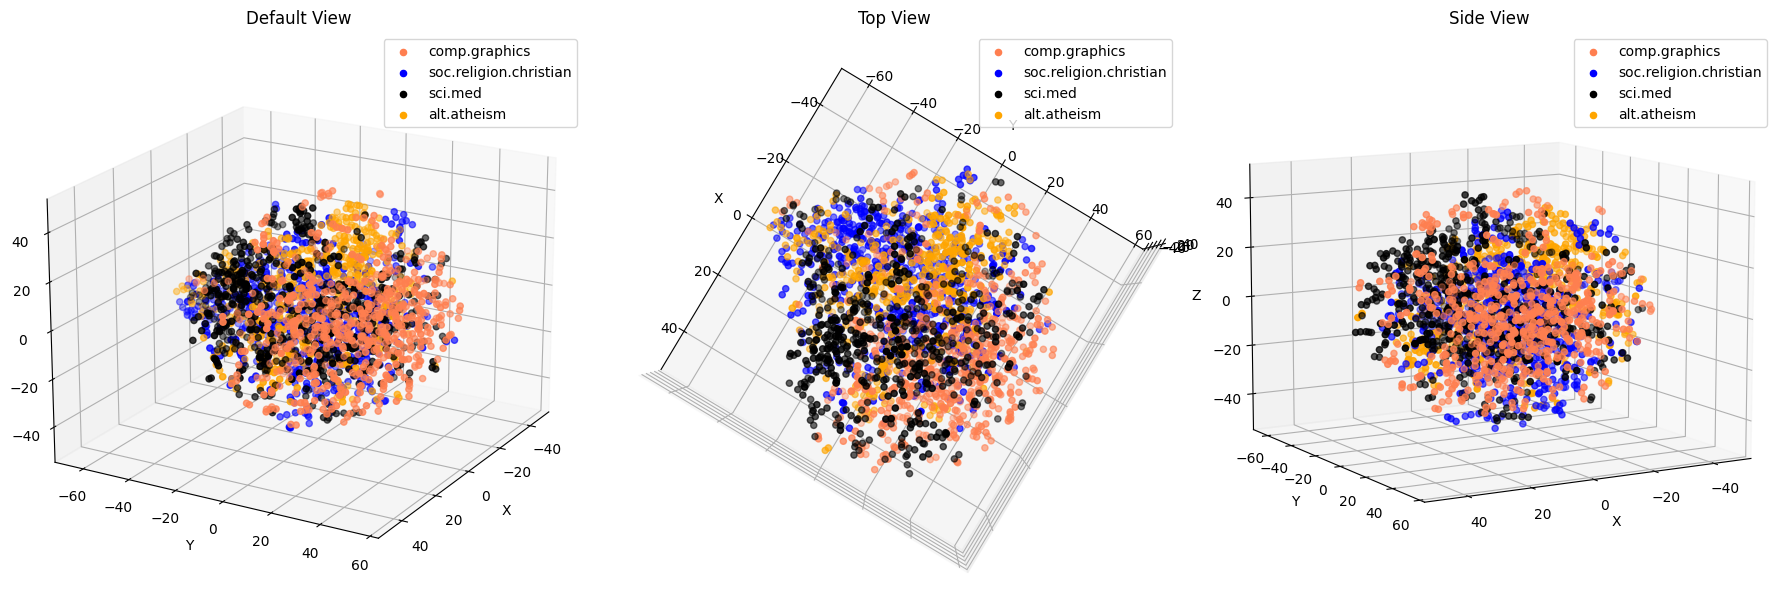

In [16]:
# Answer here

# Although they aren't very separated, we can still somewhat see the clusters.
# Dots of the same color tend to be a bit closer to each other.

X_tsne_aug = TSNE(n_components=3).fit_transform(tdm_df.values)
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

fig = plt.figure(figsize=(18, 6))

# Define a function to create a scatter plot for each method
def plot_scatter_3D(ax, X_reduced, title, elev, azim):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
        
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')
    ax.view_init(elev=elev, azim=azim)
    
plot_scatter_3D(fig.add_subplot(131, projection='3d'), X_tsne_aug, 'Default View', 20, 30)
plot_scatter_3D(fig.add_subplot(132, projection='3d'), X_tsne_aug, 'Top View', 90, 30)
plot_scatter_3D(fig.add_subplot(133, projection='3d'), X_tsne_aug, 'Side View', 10, 60)

# Show the plot
plt.tight_layout()
plt.show()

### Exercise 19 (take home):

In [20]:
# need to re-fit the label binarizer
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist() 
X[0:9]

,text,category,category_name,unigrams,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]"


### Exercise 20 (take home):

In [ ]:
# Actually there's no Exercise 20.

# Homework section